In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# Read dataset
df = pd.read_csv(
    r"C:\Users\Lenovo\Downloads\Diwali Sales Data.csv",
    encoding='ISO-8859-1'
)
df.head(5)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [4]:
# Shape of dataset
df.shape

(11251, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
# Drop unwanted columns
df.drop(['Status','unnamed1'],axis=1,inplace = True)

In [7]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [8]:
# Checking null values 
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [9]:
# Drop null values 
df.dropna(inplace = True)

In [10]:
pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [11]:
# Change data types 
df['Amount']=df['Amount'].astype('int')

In [12]:
df['Amount'].astype('int')

0        23952
1        23934
2        23924
3        23912
4        23877
         ...  
11246      370
11247      367
11248      213
11249      206
11250      188
Name: Amount, Length: 11239, dtype: int64

In [13]:
# Return description of the data
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


# Exploratory Data Analysis

In [14]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

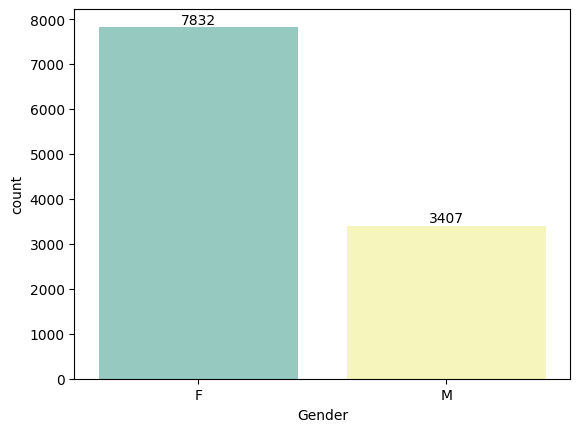

In [15]:
ax=sns.countplot(x='Gender',data = df,palette='Set3',hue='Gender')

for bar in ax.containers:
    ax.bar_label(bar)
plt.show()


In [16]:
sales = df.groupby(['Gender'], as_index= False)['Amount'].sum().sort_values(by="Amount",ascending = False)
sales

,Gender,Amount
0,F,74335853
1,M,31913276


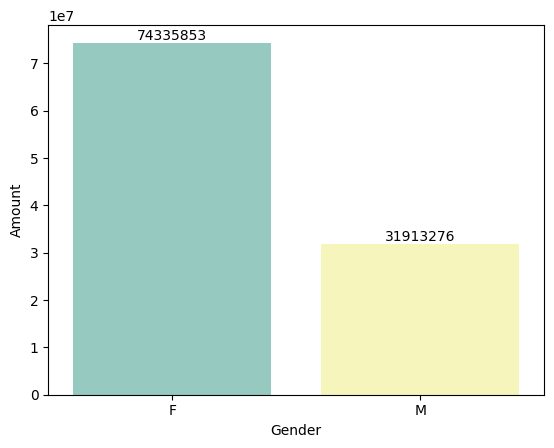

In [17]:


# Group and sort
sales = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by="Amount", ascending=False)

# Create barplot
ax = sns.barplot(x='Gender', y='Amount', data=sales, palette='Set3')

# Add labels using bar_label
for bar in ax.containers:
    ax.bar_label(bar, fmt='%d')

plt.show()


### * From above graph we can see most of the byers are feamales

## Age

In [18]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

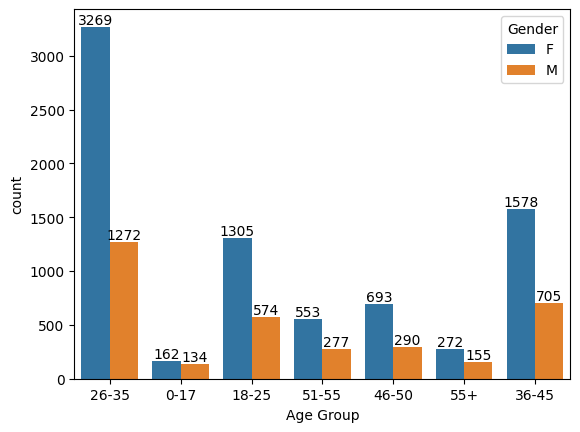

In [19]:
# Group and sort
df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by="Amount", ascending=False)
AX=sns.countplot(data = df,x='Age Group',hue='Gender')
# Add labels using bar_label
for bar in AX.containers:
    AX.bar_label(bar, fmt='%d')
plt.show()


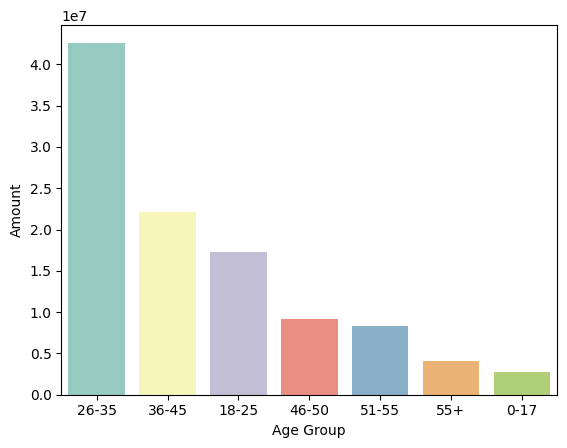

In [20]:
age_wise_sales = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by="Amount", ascending=False)

ax_ = sns.barplot(data=age_wise_sales,x='Age Group',y='Amount', palette='Set3')
plt.show()
# # Add labels
# for container in ax_.containers:
#     ax_.bar_label(container, fmt='%.0f')  # no decimal places

# plt.show()

### * From above graph we can see most of the byers are of age group beyween 26 and 35 years females

In [21]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

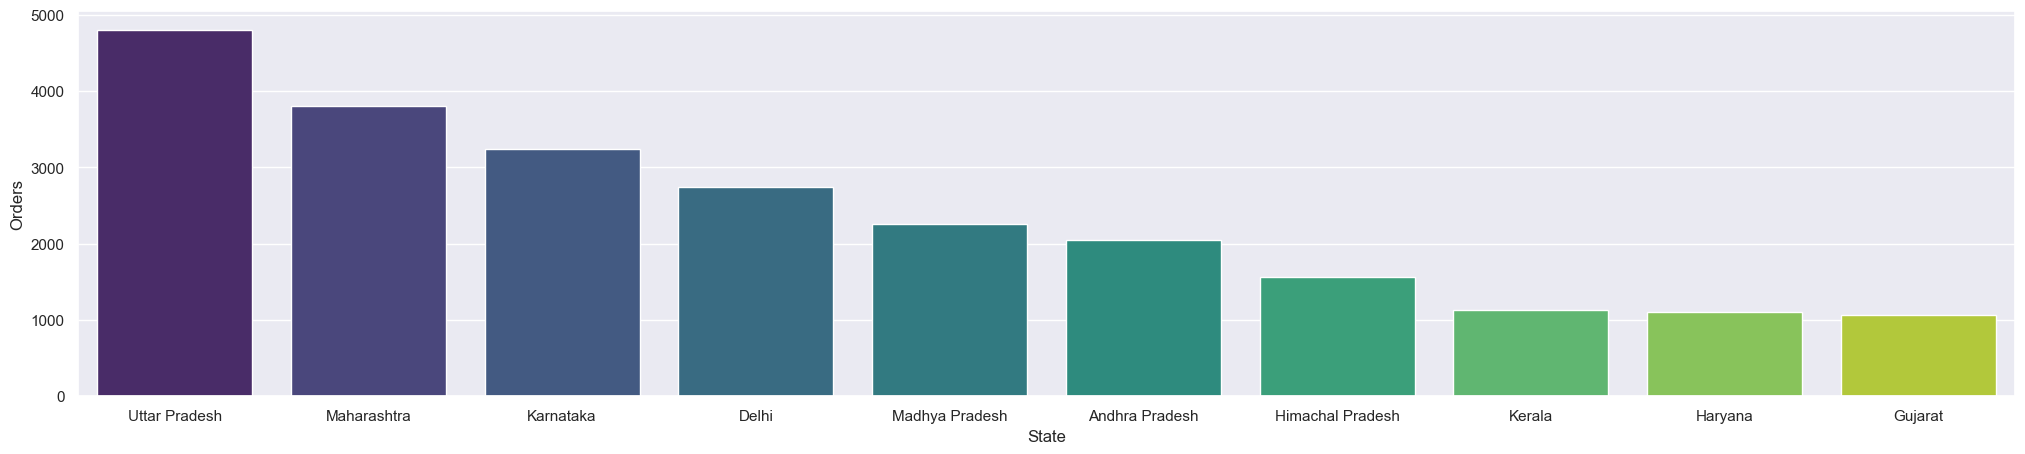

In [22]:
# State wise orders
state_wise_sales = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by="Orders", ascending=False).head(10)
sns.set(rc={'figure.figsize':(25,5)})
sns.barplot(data=state_wise_sales,x='State',y='Orders', palette='viridis')
plt.show()

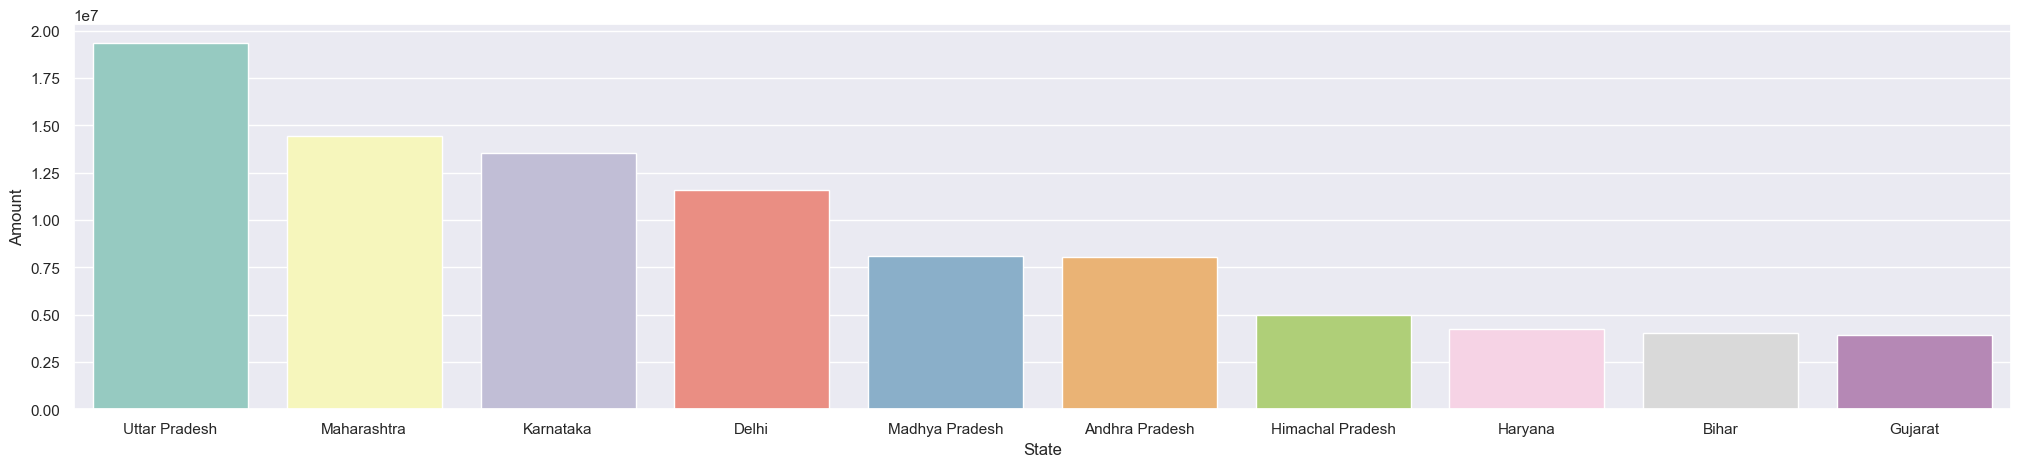

In [23]:
# State wise sales 
state_wise_sales = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by="Amount", ascending=False).head(10)

sns.set(rc={'figure.figsize':(25,5)})
ax = sns.barplot(data=state_wise_sales, x='State', y='Amount', palette='Set3')

# for container in ax.containers:
#     ax.bar_label(container, fmt='%.0f')  # no decimal places

plt.show()


In [24]:
city_values=df.State.value_counts().values
city_values

array([1944, 1525, 1304, 1104,  921,  811,  608,  453,  452,  434,  427,
        380,  320,  231,  200,  125])

In [25]:
city_lables=df.State.value_counts().index
city_lables

Index(['Uttar Pradesh', 'Maharashtra', 'Karnataka', 'Delhi', 'Madhya Pradesh',
       'Andhra Pradesh', 'Himachal Pradesh', 'Kerala', 'Haryana', 'Bihar',
       'Gujarat', 'Jharkhand', 'Uttarakhand', 'Rajasthan', 'Punjab',
       'Telangana'],
      dtype='object', name='State')

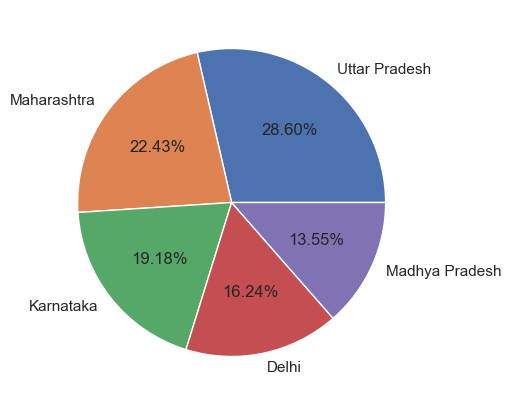

In [26]:
## Top 5 States
plt.pie(city_values[:5],labels=city_lables[:5],autopct='%1.2f%%')
plt.show()

### From above graph we can see most of the oredrs and sales from Uttar pradesh ,Maharashtra and Karnataka

In [27]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

# Marital_Status

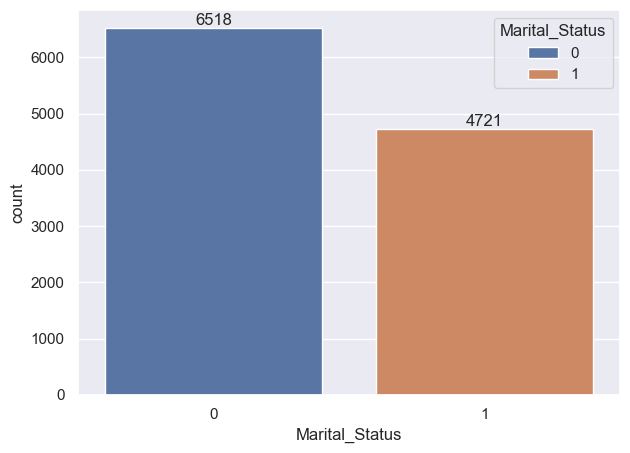

In [28]:
sns.set(rc={'figure.figsize':(7,5)})
ax=sns.countplot(data=df,x='Marital_Status',hue='Marital_Status')
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f') 
plt.show()

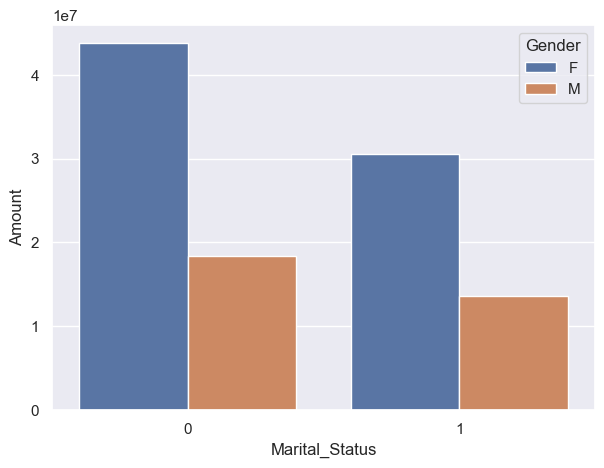

In [29]:
state_wise_sales1 = df.groupby(['Marital_Status','Gender'], as_index=False)['Amount'].sum().sort_values(by="Amount", ascending=False).head(10)

sns.set(rc={'figure.figsize':(7,5)})
ax = sns.barplot(data=state_wise_sales1, x='Marital_Status', y='Amount',hue='Gender')
plt.show()

### From above the chart we can see the most number of buyers are married (women)

In [30]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

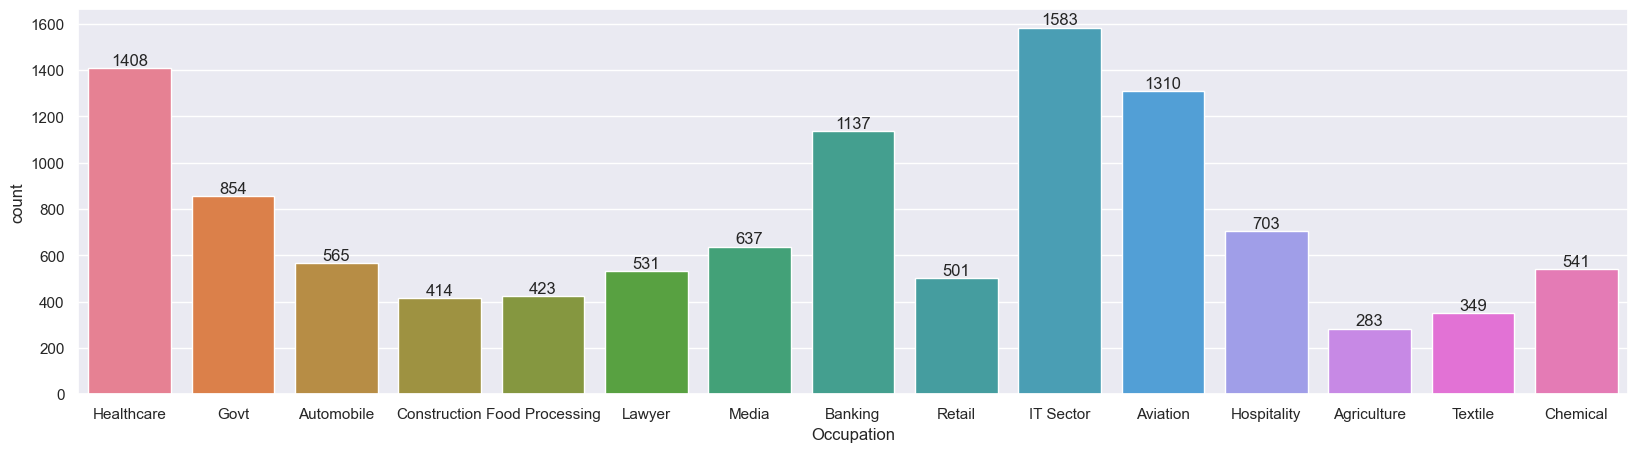

In [31]:
sns.set(rc={'figure.figsize':(20,5)})
ax=sns.countplot(data=df,x='Occupation',hue='Occupation')
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f') 
plt.show()

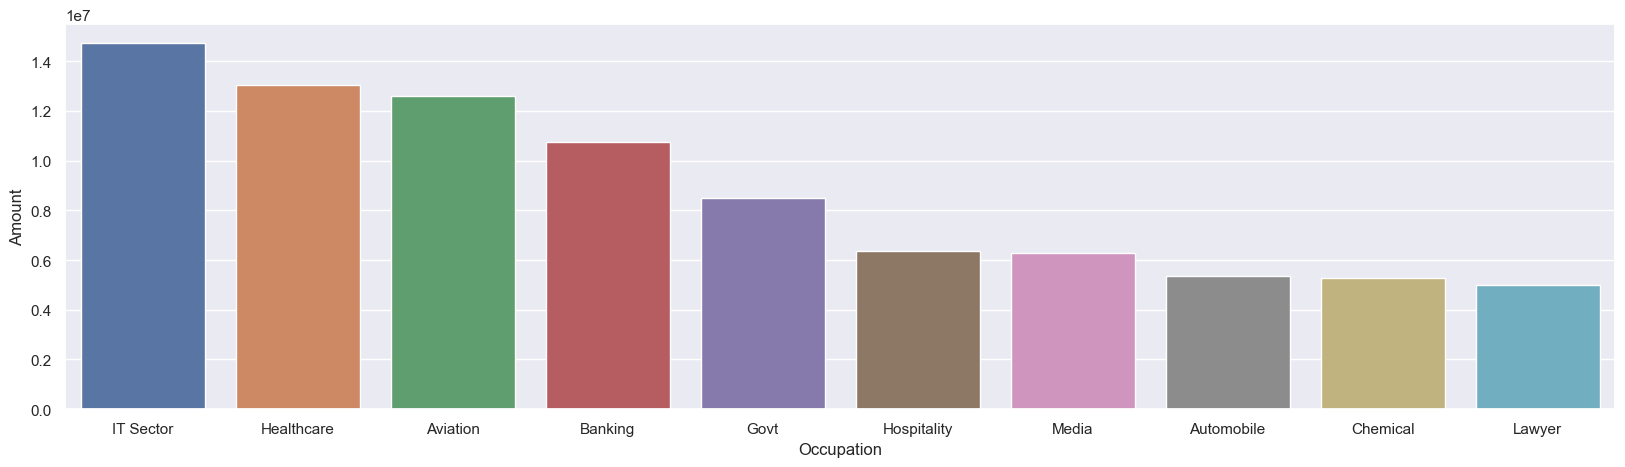

In [32]:
Occupation_wise_sales = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by="Amount", ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
ax = sns.barplot(data=Occupation_wise_sales,x='Occupation', y='Amount',hue='Occupation')
plt.show()

### From the above chart we can see the most of buyer are working in IT sector and Healthcare

In [33]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

# Product_Category sales

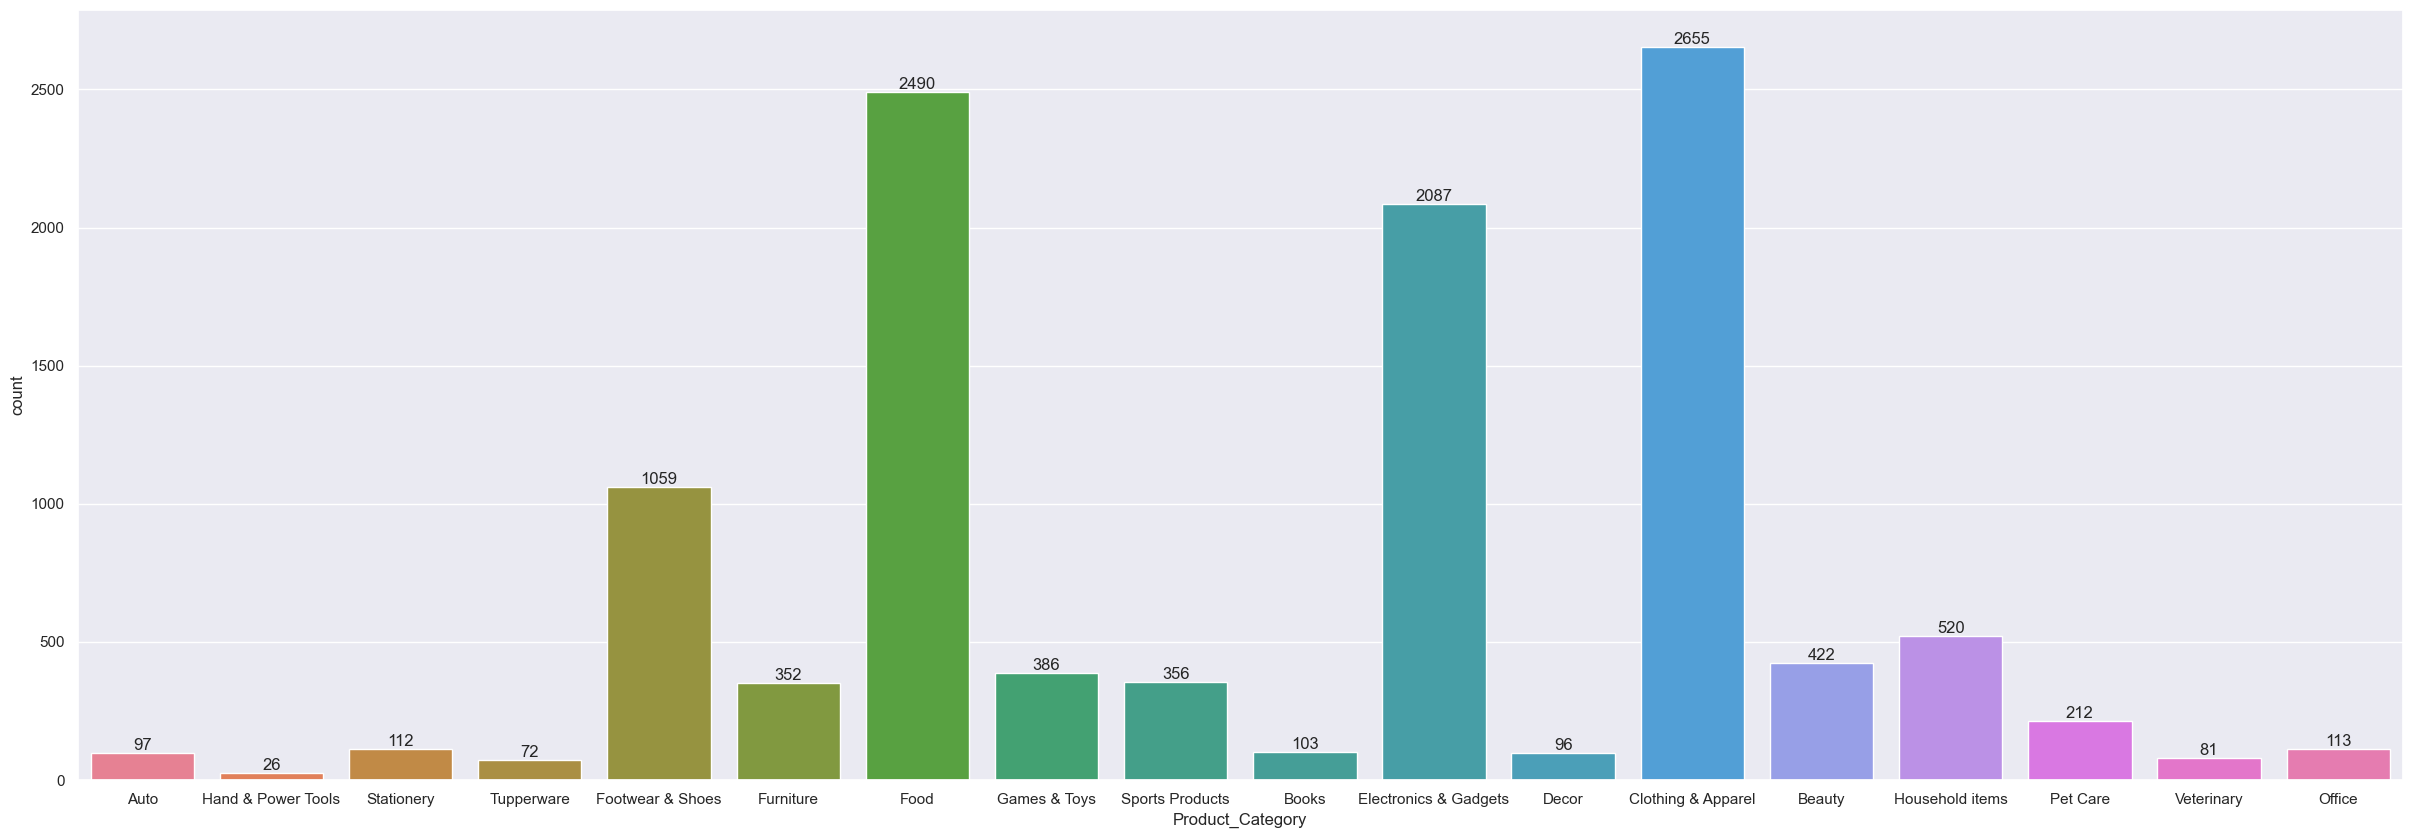

In [34]:
sns.set(rc={'figure.figsize':(30,10)})
ax=sns.countplot(data=df,x='Product_Category',hue='Product_Category')
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f') 
plt.show()

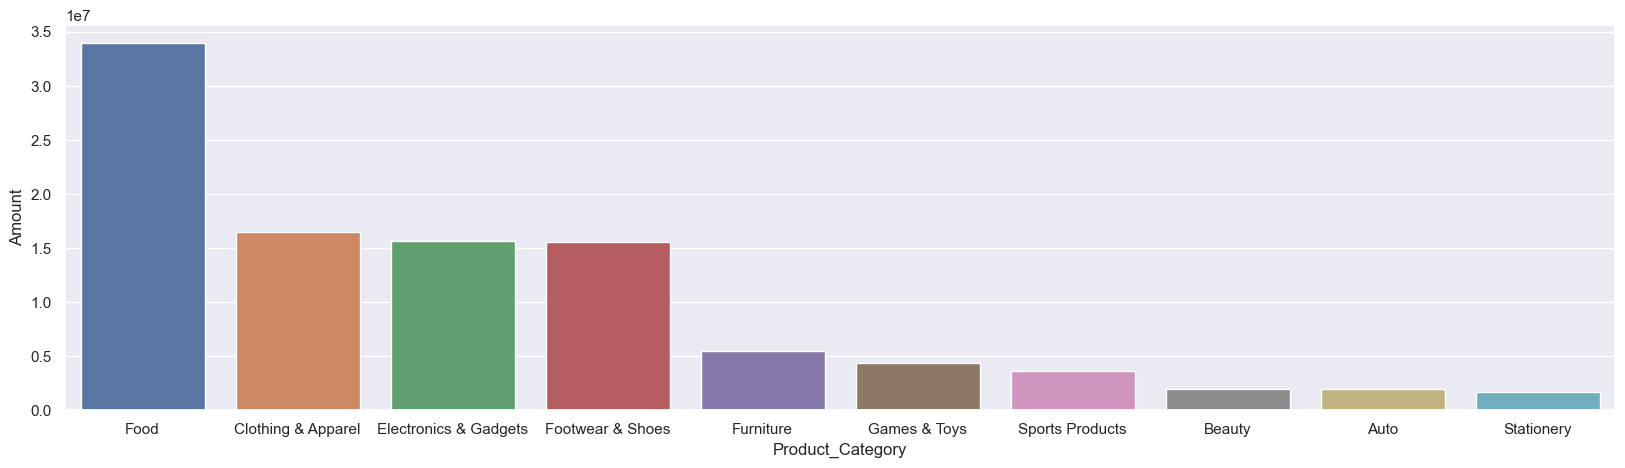

In [35]:
Occupation_wise_sales = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by="Amount", ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
ax = sns.barplot(data=Occupation_wise_sales,x='Product_Category', y='Amount',hue='Product_Category')
plt.show()

### From the above chart we can see the most of the sold products are Food and clothing 

# Conclusion 

## Married women age group 26-35 years from UP,karnataka and Maharashtra working in IT , Halthcare are more likly to buy products by Food ,Clothing and Electronics Category